# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

In [8]:
#code here
#Filter data
dragon_hp = df[(df['Type 1'] == 'Dragon') | (df['Type 2'] == 'Dragon')]['HP']
grass_hp = df[(df['Type 1'] == 'Grass') | (df['Type 2'] == 'Grass')]['HP']

In [16]:
# Check normality
stat_dragon, p_dragon = shapiro(dragon_hp)
stat_grass, p_grass = shapiro(grass_hp)

print(f"Shapiro-Wilk Test for Dragon: Statistic={stat_dragon:.4f}, P-value={p_dragon:.4f}")
print(f"Shapiro-Wilk Test for Grass: Statistic={stat_grass:.4f}, P-value={p_grass:.4f}")
if p_dragon < 0.05:
    print("Dragon HP is not normally distributed.")
else:
    print("Dragon HP is normally distributed.")

if p_grass < 0.05:
    print("Grass HP is not normally distributed.")
else:
    print("Grass HP is normally distributed.")

#Perform t-test
stat_t, p_t = ttest_ind(dragon_hp, grass_hp, equal_var=equal_var)
print(f"T-Test: Statistic={stat_t:.4f}, P-value={p_t:.4f}")

#Interpret results
alpha = 0.05  # Significance level
if p_t < alpha:
    print("The average HP of Dragon Pokémon is significantly different from Grass Pokémon.")
    if stat_t > 0:
        print("Dragon Pokémon have higher average HP than Grass Pokémon.")
    else:
        print("Grass Pokémon have higher average HP than Dragon Pokémon.")
else:
    print("There is no significant difference in the average HP between Dragon and Grass Pokémon.")

Shapiro-Wilk Test for Dragon: Statistic=0.9630, P-value=0.1186
Shapiro-Wilk Test for Grass: Statistic=0.9721, P-value=0.0402
Dragon HP is normally distributed.
Grass HP is not normally distributed.
T-Test: Statistic=4.4991, P-value=0.0000
The average HP of Dragon Pokémon is significantly different from Grass Pokémon.
Dragon Pokémon have higher average HP than Grass Pokémon.


- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the propper test and, with 5% significance, comment your findings.


In [32]:
#Split the data
legendary = df[df['Legendary'] == True]
non_legendary = df[df['Legendary'] == False]

# List of stats to compare
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Significance level for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(stats)

# Results storage
results = []

for stat in stats:
    #Check normality
    stat_legendary, p_legendary = shapiro(legendary[stat])
    stat_non_legendary, p_non_legendary = shapiro(non_legendary[stat])
    
    # Normality results
    normal_legendary = p_legendary >= 0.05
    normal_non_legendary = p_non_legendary >= 0.05

    #Perform t-test
    t_stat, p_value = ttest_ind(legendary[stat], non_legendary[stat], equal_var=equal_var)
    
    # Store results
    results.append({
        'Stat': stat,
        'P-value': p_value,
        'Significant': p_value < alpha,
        'Equal Variance': equal_var
    })


In [34]:
#Display results
results_df = pd.DataFrame(results)
print(results_df)

# Interpretation
for _, row in results_df.iterrows():
    if row['Significant']:
        print(f"The stat '{row['Stat']}' differs significantly between Legendary and Non-Legendary Pokémon (P-value: {row['P-value']:.4f}).")
    else:
        print(f"The stat '{row['Stat']}' does not differ significantly between Legendary and Non-Legendary Pokémon (P-value: {row['P-value']:.4f}).")

      Stat       P-value  Significant  Equal Variance
0       HP  3.330648e-15         True            True
1   Attack  7.827253e-24         True            True
2  Defense  1.584223e-12         True            True
3  Sp. Atk  6.314916e-41         True            True
4  Sp. Def  1.843981e-26         True            True
5    Speed  2.354075e-21         True            True
The stat 'HP' differs significantly between Legendary and Non-Legendary Pokémon (P-value: 0.0000).
The stat 'Attack' differs significantly between Legendary and Non-Legendary Pokémon (P-value: 0.0000).
The stat 'Defense' differs significantly between Legendary and Non-Legendary Pokémon (P-value: 0.0000).
The stat 'Sp. Atk' differs significantly between Legendary and Non-Legendary Pokémon (P-value: 0.0000).
The stat 'Sp. Def' differs significantly between Legendary and Non-Legendary Pokémon (P-value: 0.0000).
The stat 'Speed' differs significantly between Legendary and Non-Legendary Pokémon (P-value: 0.0000).


**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 37)
- Hospital coordinates (-122, 34)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

The difference in house prices is statistically significant (P-value: 0.0058).


C:\Users\vasco\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16995.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\vasco\AppData\Local\Temp\ipykernel_4664\3127079417.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='close_to_school_or_hospital', y='median_house_value', data=df, palette="Set2")


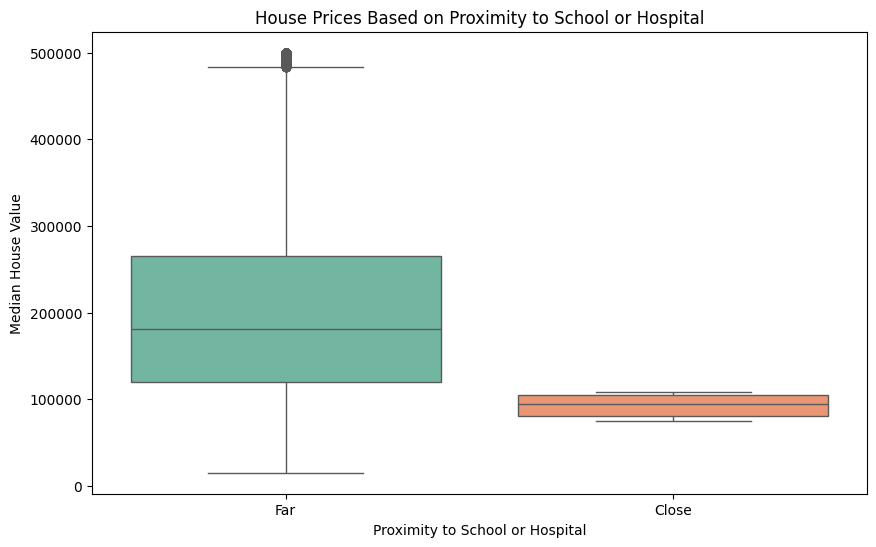

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")

#Define coordinates
school_coords = (-118, 37)
hospital_coords = (-122, 34)

# Function to calculate Euclidean distance
def calculate_distance(lon, lat, coord):
    return np.sqrt((lon - coord[0])**2 + (lat - coord[1])**2)

#Calculate distances
df['distance_to_school'] = calculate_distance(df['longitude'], df['latitude'], school_coords)
df['distance_to_hospital'] = calculate_distance(df['longitude'], df['latitude'], hospital_coords)

# Classify houses as "close" if within 0.50 of either
df['close_to_school_or_hospital'] = (df['distance_to_school'] < 0.50) | (df['distance_to_hospital'] < 0.50)

# Split the data
close_houses = df[df['close_to_school_or_hospital']]
far_houses = df[~df['close_to_school_or_hospital']]

# Check assumptions and perform the test
# Check normality
_, p_close_normality = shapiro(close_houses['median_house_value'])
_, p_far_normality = shapiro(far_houses['median_house_value'])

# Check variance homogeneity
_, p_levene = levene(close_houses['median_house_value'], far_houses['median_house_value'])

if p_close_normality >= 0.05 and p_far_normality >= 0.05 and p_levene >= 0.05:
    # Perform independent t-test
    t_stat, p_value = ttest_ind(close_houses['median_house_value'], far_houses['median_house_value'], equal_var=True)
else:
    # Perform Mann-Whitney U test
    t_stat, p_value = mannwhitneyu(close_houses['median_house_value'], far_houses['median_house_value'])

# Step 6: Interpret results
alpha = 0.05

if p_value < alpha:
    print(f"The difference in house prices is statistically significant (P-value: {p_value:.4f}).")
else:
    print(f"The difference in house prices is not statistically significant (P-value: {p_value:.4f}).")

# Visualize
plt.figure(figsize=(10, 6))
sns.boxplot(x='close_to_school_or_hospital', y='median_house_value', data=df, palette="Set2")
plt.xticks([0, 1], ['Far', 'Close'])
plt.title("House Prices Based on Proximity to School or Hospital")
plt.ylabel("Median House Value")
plt.xlabel("Proximity to School or Hospital")
plt.show()
